Noms i NIU dels integrants:
  - **Nom:** David Morillo Massagué
  - **NIU:** 1666540
  - **Nom:** Adrià Muro Gómez
  - **NIU:** 1665191
  - **Nom:** Lucia Garrido Rosas
  - **NIU:** 1671463

## Dataset utilitzat:

https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset 

## Llibreries utilitzades

In [10]:
%pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from metrics_module import metrics
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from dataloader_module import load_data
import numpy as np

## Càrrega i pre-processament de les dades

In [12]:
datafile = "data/healthcare-dataset-stroke-data.csv"


X, y = load_data(datafile)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Creació i test de l'arbre de decissió

Accuracy: 0.9463
Precision: 0.9431
Recall: 0.9520
F1 Score: 0.9475


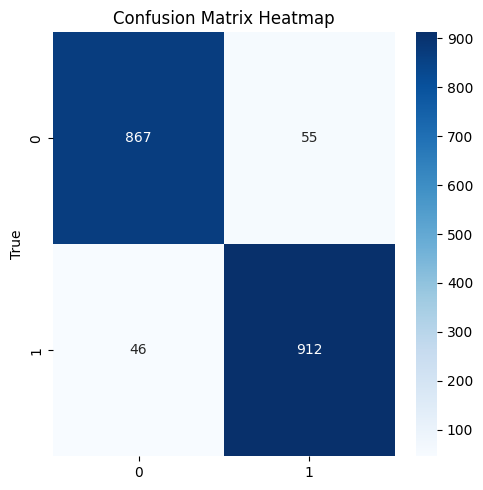

In [13]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

np.save('predictions/predictions_tree.npy', y_pred)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)

## Visualització de l'arbre de decisió

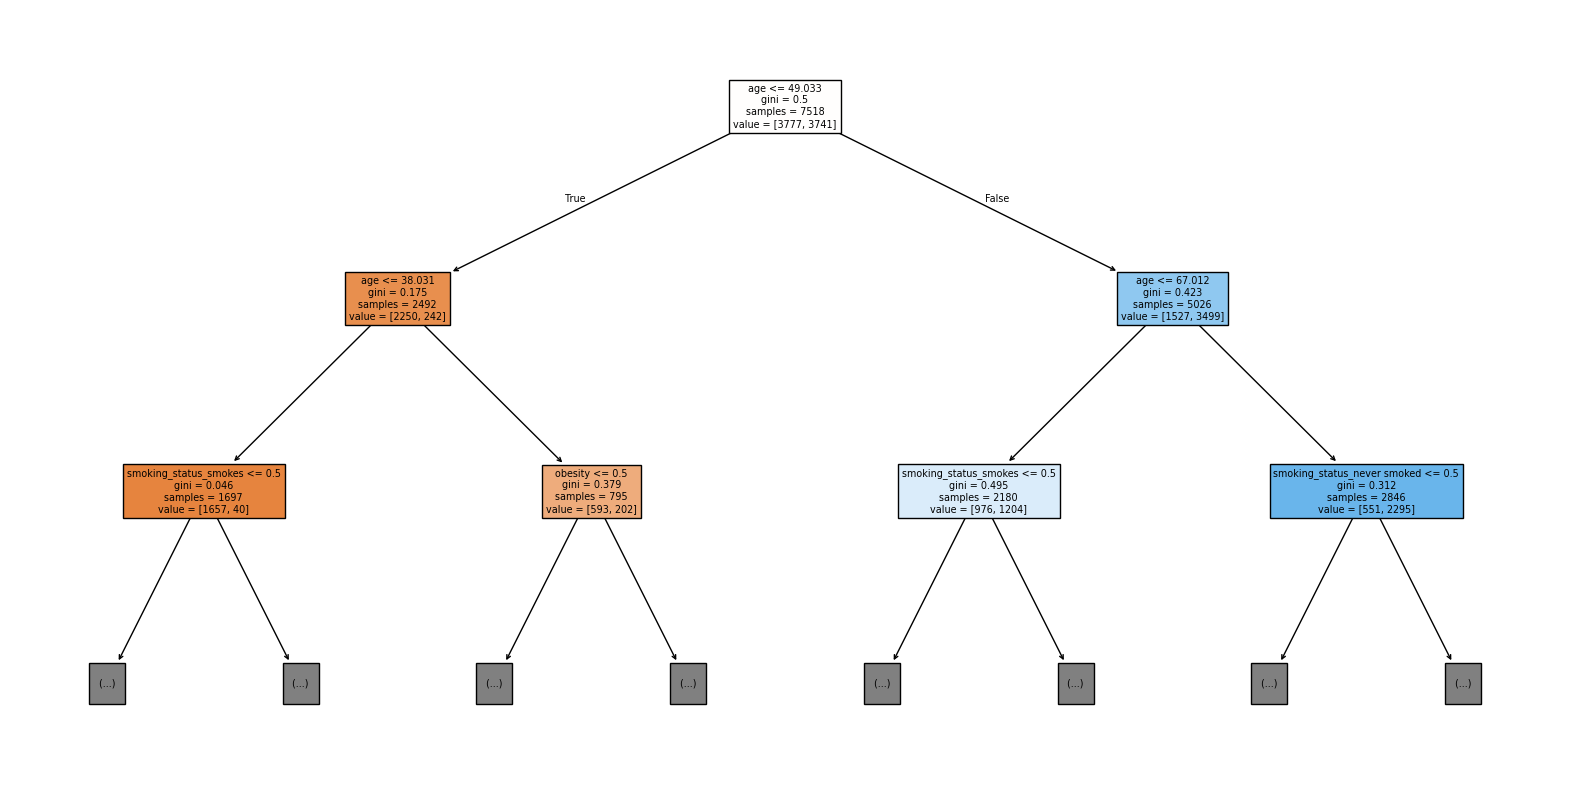

In [14]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

## Visualització dels factors més importants pel model

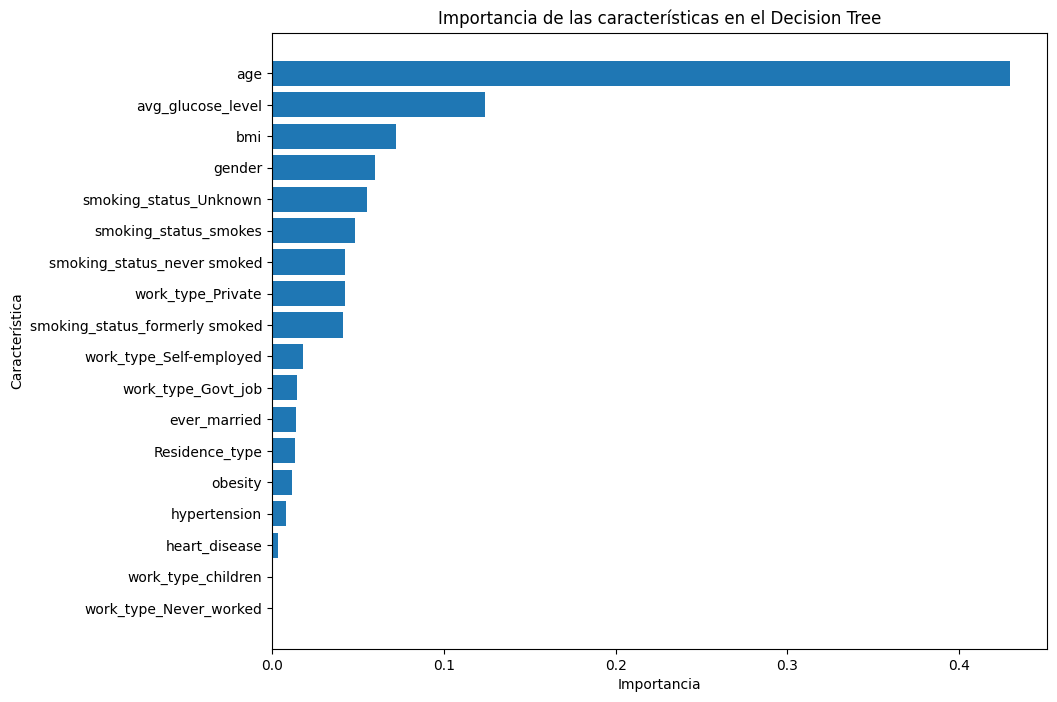

In [15]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()

## Li treiem les tres característiques més importants segons el gràfic generat

Accuracy: 0.9399
Precision: 0.9818
Recall: 0.8987
F1 Score: 0.9384


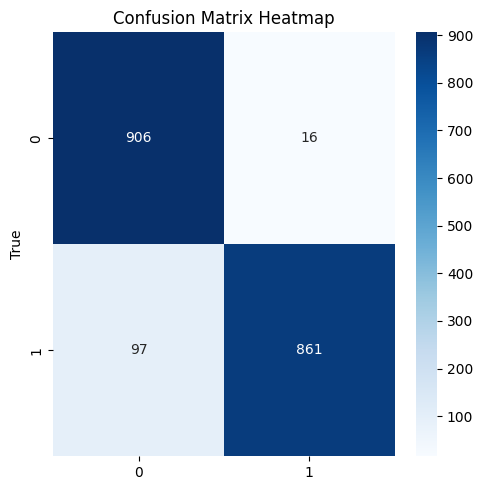

In [16]:
X = X.drop(columns=[ "bmi", "avg_glucose_level", "age"])

X = X.replace([float('inf'), -float('inf')], 0)

#eliminar files amb NaN
X = X.dropna()
y = y[X.index] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy, precision, recall, f1, conf_matrix = metrics(y_test, y_pred, print_metrics=True)



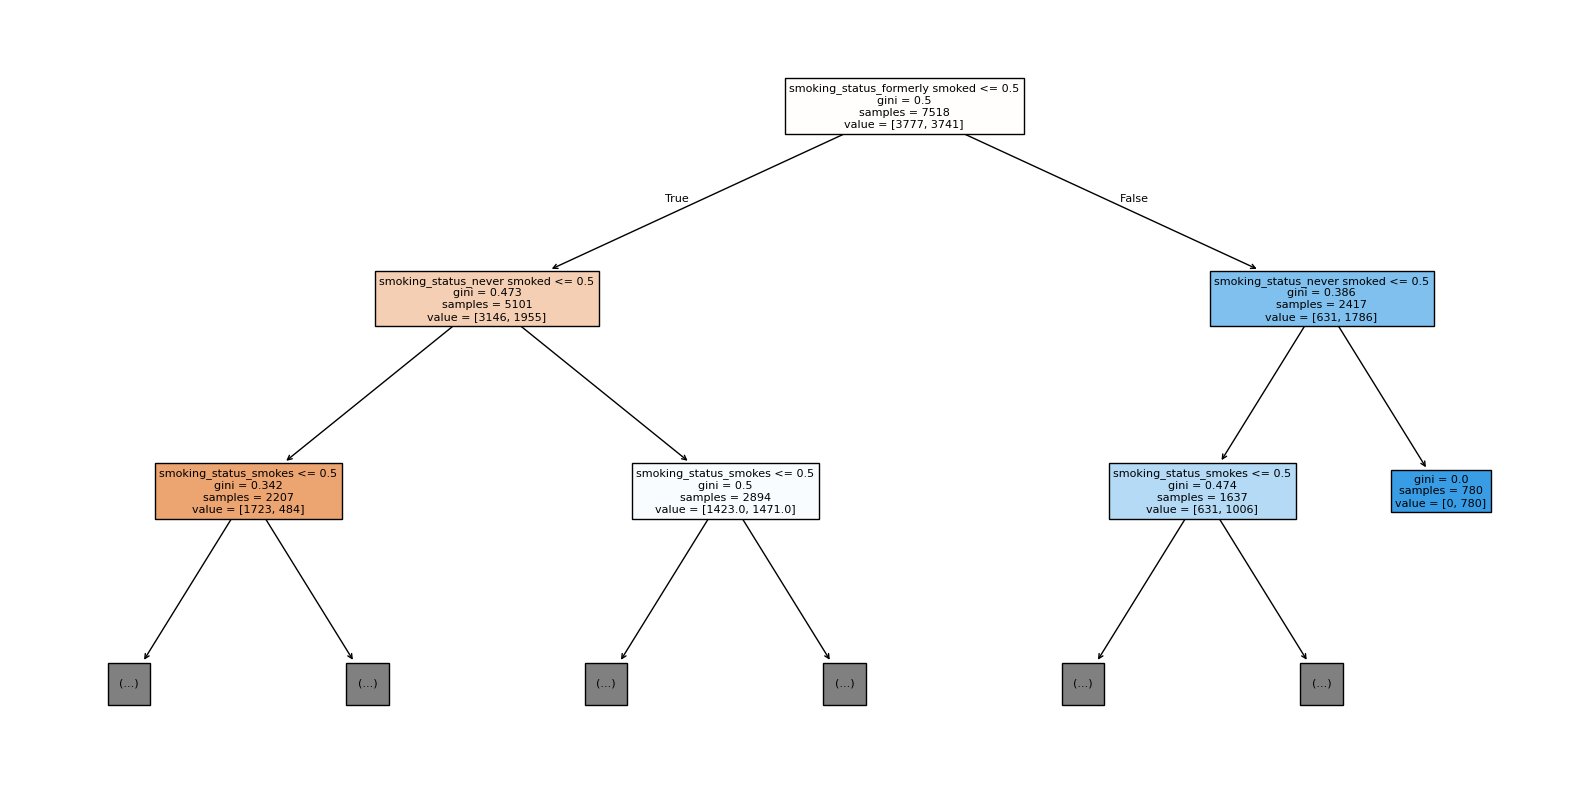

In [17]:
plt.figure(figsize=(20,10))
plot_tree(clf, filled=True, feature_names=X.columns, max_depth=2)
plt.show()

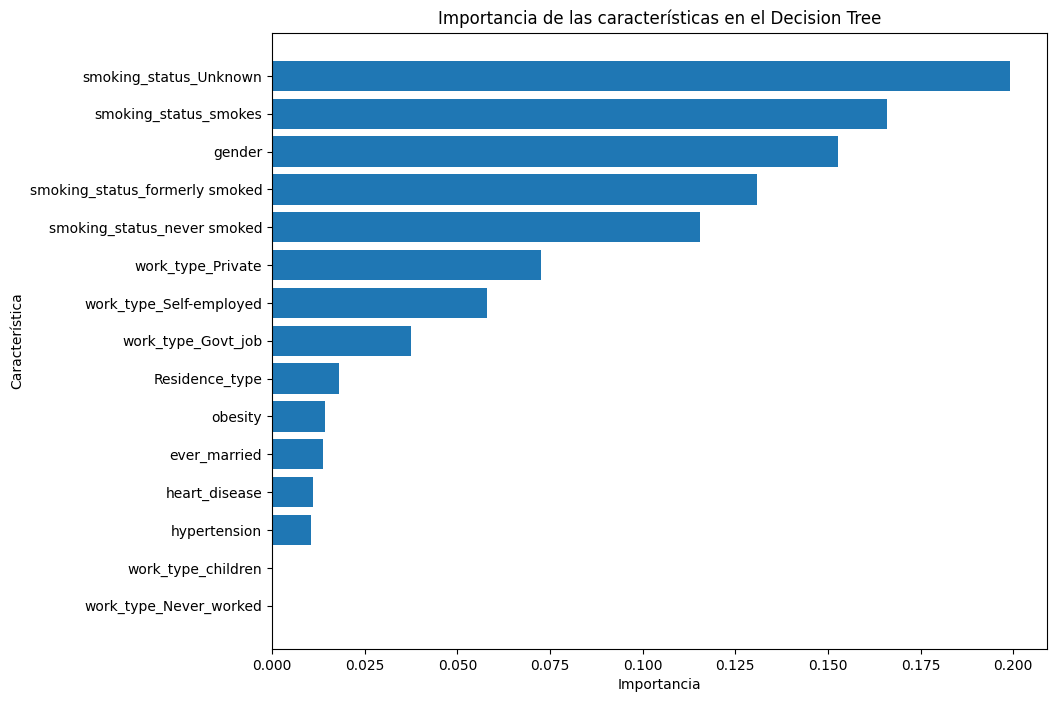

In [18]:
feature_importances = clf.feature_importances_

feature_importances_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.title('Importancia de las características en el Decision Tree')
plt.gca().invert_yaxis()
plt.show()